# ECE 57000 Assignment 3 Exercise

Your Name: Sai V. Mudumba

## Exercise 1: Why use a CNN rather than only fully connected layers? (MNIST)

In this exercise, you will build two models for the **MNIST** dataset: one uses only fully connected layers and another uses a standard CNN layout (convolution layers everywhere except the last layer is fully connected layer). The two models should be built with roughly the same accuracy performance, your task is to compare the number of network parameters (a huge number of parameters can affect training/testing time, memory requirements, overfitting, etc.).

### Task 1: Following the structure used in the instructions, you should create

*   One network named **OurFC** which should consist with only fully connected layers

  *   You should decide how many layers and how many hidden dimensions you want in your network 
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   There is no need to make the neural network unnecessarily complex, your total training time should no longer than 3 mins

*   Another network named **OurCNN** which applys a standard CNN structure
  *   Again, you should decide how many layers and how many channels you want for each layer.
  *   Your final accuracy also should lie roughly around 90% ($\pm$2%)
  *   A standard CNN structure can be composed as **[Conv2d, MaxPooling, ReLU] x num_conv_layers + FC x num_fc_layers**

* Train and test your network on MNIST data as in the instructions

In [ ]:
# Import torch: python ML library developed by Facebook AI
import torch
# Import torchvision: library that contains popular datasets (e.g., MNIST, FMNIST, LSUN, CIFAR, etc.)
import torchvision

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,),(0.3081,))])
train_dataset = torchvision.datasets.MNIST('/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('/data', train=False, download=True, transform=transform)
print(train_dataset)

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw




Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw
Processing...
Done!
Dataset MNIST
    Number of datapoints: 60000
    Root location: /data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )



/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
batch_size_train, batch_size_test = 64, 1000
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True) # everytime, a shuffled batch of 64 images are chosen from the train dataset 
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False) # everytime, a batch of 1000 (non-shuffled) are chosen from the test dataset
print(train_loader)
batch_idx, (images, targets) = next(enumerate(train_loader))
print(batch_idx)
print(images) # prints the pixel values of size 28 x 28 x 1 x 64
print(targets) # prints the target numbers (e.g., 1,2,3,4,...)

0
tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4

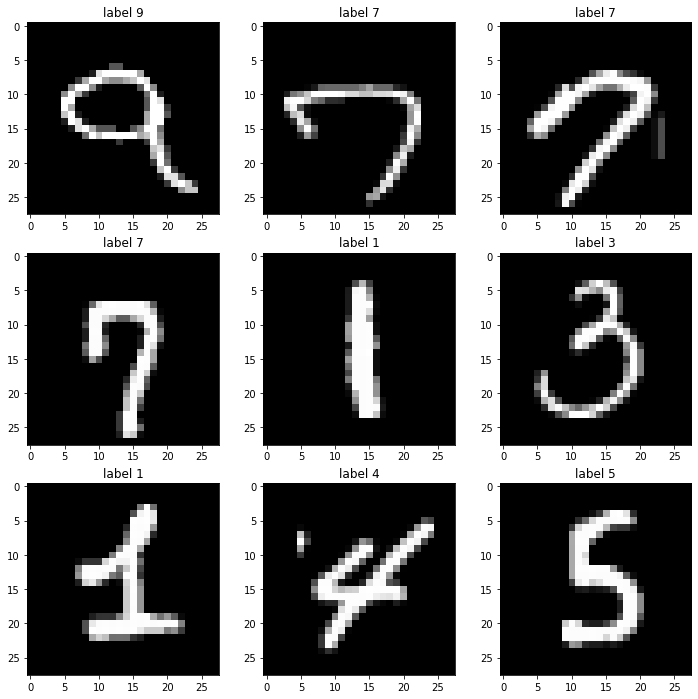

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(images[i*3+j][0], cmap='gray')
    ax[i,j].set_title(f'label {targets[i*3+j]}')
fig.show()

**Neural Network Structure: OurFC**

This simple neural network utilizes only the fully connected layers



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

input_size = 784 # the input size is the number of pixels in the image: 28 x 28 = 784
output_size = 10 # the output size corresponds to possible digits: 0 through 9
hidden_size_1 = 200 # I used this number from the reference, which I will provide below
learning_rate = 0.01
momentum = 0.8

class OurFC(nn.Module):

  def __init__(self):
    super(OurFC, self).__init__()

    self.l1 = nn.Linear(input_size, hidden_size_1) # (input_dim, hidden_dim)
    self.l2 = nn.Linear(hidden_size_1, output_size)

  def forward(self, x):
    x = x.view(-1, input_size) # x now has shape (batchsize x 784)    
    x = self.l1(x) # x now has the shape (batchsize x ) --> (batch x 200)
    x = x.view(-1, hidden_size_1)
    x = self.l2(x)
    
    return F.log_softmax(x)


In [ ]:
import torch.optim as optim

classifier = OurFC()
optimizer = optim.SGD(classifier.parameters(), learning_rate, momentum)

In [ ]:
def train(epoch):
  classifier.train() # we need to set the mode for the model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifier(images)
    loss = F.nll_loss(output, targets) # here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0: # we record our output every 10 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append((batch_idx*64 + ((epoch-1)*len(train_loader.dataset))))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')

def test(epoch):
  classifier.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(epoch)
  test(epoch)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1: [0/60000] Loss: 2.3777661323547363
Epoch 1: [6400/60000] Loss: 0.5020325183868408
Epoch 1: [12800/60000] Loss: 0.4928688406944275
Epoch 1: [19200/60000] Loss: 0.30650264024734497
Epoch 1: [25600/60000] Loss: 0.25670325756073
Epoch 1: [32000/60000] Loss: 0.25146934390068054
Epoch 1: [38400/60000] Loss: 0.4338001012802124
Epoch 1: [44800/60000] Loss: 0.13598378002643585
Epoch 1: [51200/60000] Loss: 0.30833956599235535
Epoch 1: [57600/60000] Loss: 0.24714472889900208
Test result on epoch 1: Avg loss is 0.2894399169921875, Accuracy: 91.81999969482422%
Epoch 2: [0/60000] Loss: 0.2962476909160614
Epoch 2: [6400/60000] Loss: 0.3832082748413086
Epoch 2: [12800/60000] Loss: 0.42144906520843506
Epoch 2: [19200/60000] Loss: 0.3558841049671173
Epoch 2: [25600/60000] Loss: 0.4390484392642975
Epoch 2: [32000/60000] Loss: 0.30699753761291504
Epoch 2: [38400/60000] Loss: 0.11044324189424515
Epoch 2: [44800/60000] Loss: 0.31265580654144287
Epoch 2: [51200/60000] Loss: 0.17238759994506836
Epoch

Text(0, 0.5, 'negative log likelihood loss')

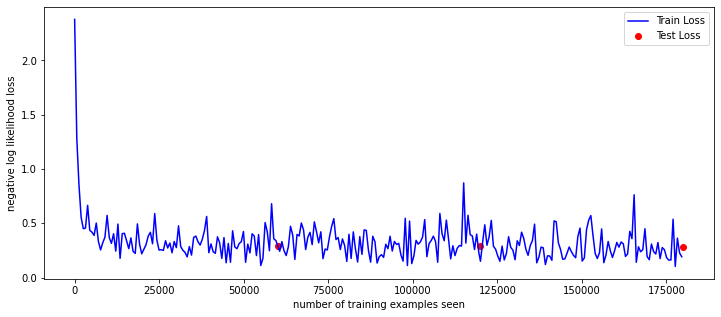

In [ ]:
fig = plt.figure(figsize=(12,5))
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

**Neural Network Structure: OurCNN**

In [ ]:

import torch.nn as nn
import torch.nn.functional as F

input_size = 784 # the input size is the number of pixels in the image: 28 x 28 = 784
output_size = 10 # the output size corresponds to possible digits: 0 through 9
hidden_size = 25 # I used this number from the reference, which I will provide below
learning_rate = 0.01
momentum = 0.8

class OurCNN(nn.Module):

  def __init__(self):
    super(OurCNN, self).__init__()

    self.conv = nn.Conv2d(1, 2, kernel_size=9)
    self.l1 = nn.Linear(32, hidden_size) # (input_dim, hidden_dim)
    self.l2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.conv(x)  # (batchsize x 2 x 20 x 20)
    x = F.relu(F.max_pool2d(x,5)) # # x now has shape (batchsize x 2 x 4 x 4)
    x = x.view(-1, 32) # x now has shape (batchsize x 48)    
    x = self.l1(x) # x now has the shape (batchsize x ) --> (batch x 200)
    x = x.view(-1, hidden_size)
    x = F.relu(self.l2(x))
    return F.log_softmax(x)

In [ ]:
import torch.optim as optim

classifierCNN = OurCNN()
optimizer = optim.SGD(classifierCNN.parameters(), learning_rate, momentum)

In [ ]:
def train(epoch):
  classifierCNN.train() # we need to set the mode for the model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifierCNN(images)
    loss = F.nll_loss(output, targets) # here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0: # we record our output every 10 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append((batch_idx*64 + ((epoch-1)*len(train_loader.dataset))))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')

def test(epoch):
  classifierCNN.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifierCNN(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(epoch)
  test(epoch)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1: [0/60000] Loss: 2.3170392513275146
Epoch 1: [6400/60000] Loss: 1.7781411409378052
Epoch 1: [12800/60000] Loss: 1.671174168586731
Epoch 1: [19200/60000] Loss: 1.5159705877304077
Epoch 1: [25600/60000] Loss: 0.8703538179397583
Epoch 1: [32000/60000] Loss: 0.6548798680305481
Epoch 1: [38400/60000] Loss: 0.7981682419776917
Epoch 1: [44800/60000] Loss: 0.6672380566596985
Epoch 1: [51200/60000] Loss: 0.19515827298164368
Epoch 1: [57600/60000] Loss: 0.1319723278284073
Test result on epoch 1: Avg loss is 0.23929595184326172, Accuracy: 92.51000213623047%
Epoch 2: [0/60000] Loss: 0.1900843381881714
Epoch 2: [6400/60000] Loss: 0.11713030189275742
Epoch 2: [12800/60000] Loss: 0.20964005589485168
Epoch 2: [19200/60000] Loss: 0.14004139602184296
Epoch 2: [25600/60000] Loss: 0.42253798246383667
Epoch 2: [32000/60000] Loss: 0.13509228825569153
Epoch 2: [38400/60000] Loss: 0.09159259498119354
Epoch 2: [44800/60000] Loss: 0.04628732427954674
Epoch 2: [51200/60000] Loss: 0.1100989282131195
Epoch

Text(0, 0.5, 'negative log likelihood loss')

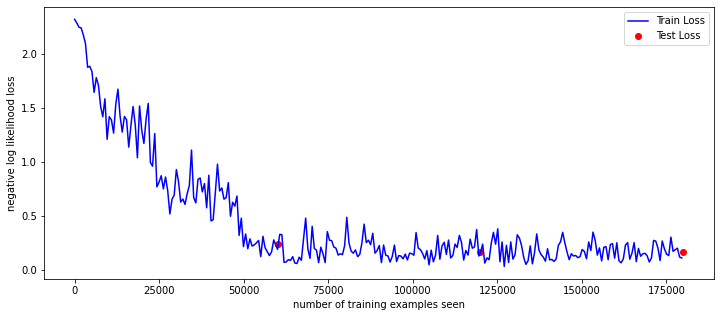

In [ ]:
fig = plt.figure(figsize=(12,5))
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

### Task 2: Compare the number of parameters that are used in both your neural networks by printing out the total number of parameters for both of your networks.

In [ ]:
total_params = sum(p.numel() for p in classifier.parameters())
print(f'Our Fully Connected neural network has a total of {total_params} parameters')

Our Fully Connected neural network has a total of 159010 parameters


In [ ]:
total_params = sum(p.numel() for p in classifierCNN.parameters())
print(f'Our CNN has a total of {total_params} parameters')

Our CNN has a total of 1249 parameters


## Exercise 2: Train classifier on CIFAR-10 data.
Now, lets move our dataset to color images. CIFAR-10 dataset is another widely used dataset. Here all images have colors, i.e each image has 3 color channels instead of only one channel in MNIST. You need to pay more attention to the dimension of the data when it is walking through your network.

### Task 1:
Set up a `train_loader` and `test_loader` for the CIFAR-10 data, and plot a figure:

*   3 x 3 subplot
*   each subplot is a randomly chosen image from the test dataset
*   label each image with its label

The corresponding names of the classes is given as 
`classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')`

Note: In your transforms, the normalizing constant is given as `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])`

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


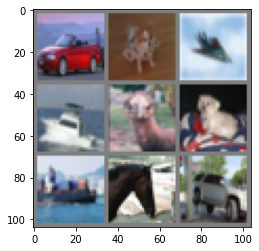

  car   dog plane  ship  bird   dog  ship horse   car


In [ ]:
# ----------- <Your code> ---------------
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=9,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images, nrow=3))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(9)))

### Task 2:
Set up a convolutional neural network and have your data trained on it. You have to decide all the details in your network, overall your neural network should meet the following standards:


*   You should not use more than three convolutional layers and three fully connected layers
*   Accuracy on the test dataset should be roughly 50%



In [ ]:
# ----------- <Your code> ---------------
# You should have your test accuracy printed in the output box
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # nn.Conv2d(in_channels, out_channels/n_filters, kernel_size)
        self.conv1 = nn.Conv2d(3, 6, 5)
        # nn.MaxPool2d(kernel_size, stride)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # nn.Linear(in_features, out_features)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
# Remember convolution weight has size (out_channels, in_channels, *kernel_size)
for name, p in net.named_parameters():
    print(name, ',', p.size(), type(p))
    #print(type(p))
    #print(p)

conv1.weight , torch.Size([6, 3, 5, 5]) <class 'torch.nn.parameter.Parameter'>
conv1.bias , torch.Size([6]) <class 'torch.nn.parameter.Parameter'>
conv2.weight , torch.Size([16, 6, 5, 5]) <class 'torch.nn.parameter.Parameter'>
conv2.bias , torch.Size([16]) <class 'torch.nn.parameter.Parameter'>
fc1.weight , torch.Size([120, 400]) <class 'torch.nn.parameter.Parameter'>
fc1.bias , torch.Size([120]) <class 'torch.nn.parameter.Parameter'>
fc2.weight , torch.Size([84, 120]) <class 'torch.nn.parameter.Parameter'>
fc2.bias , torch.Size([84]) <class 'torch.nn.parameter.Parameter'>
fc3.weight , torch.Size([10, 84]) <class 'torch.nn.parameter.Parameter'>
fc3.bias , torch.Size([10]) <class 'torch.nn.parameter.Parameter'>


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.261
[1,  4000] loss: 1.882
[1,  6000] loss: 1.682
[1,  8000] loss: 1.573
[1, 10000] loss: 1.534
[1, 12000] loss: 1.481
[2,  2000] loss: 1.420
[2,  4000] loss: 1.381
[2,  6000] loss: 1.373
[2,  8000] loss: 1.320
[2, 10000] loss: 1.303
[2, 12000] loss: 1.289
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
test_loader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=True, num_workers=2)
correct = 0
incorrect = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        incorrect += (predicted != labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

print('Inaccuracy of the network on the 10000 test images: %d %%' % (
    100 * incorrect / total))

Accuracy of the network on the 10000 test images: 55 %
Inaccuracy of the network on the 10000 test images: 44 %


### Task 3:
Plot some misclassified images in your test dataset:

*   select three images that are **misclassified** by your neural network
*   label each images with true label and predicted label



The predicted label: deer
The true label: horse


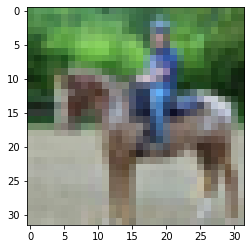

The predicted label: horse
The true label: deer


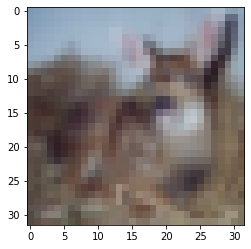

The predicted label: dog
The true label: horse


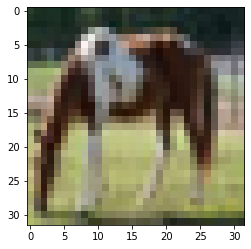

The predicted label: plane
The true label: bird


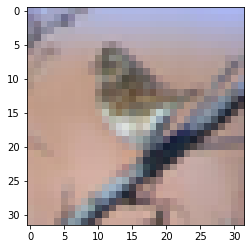

The predicted label: dog
The true label: cat


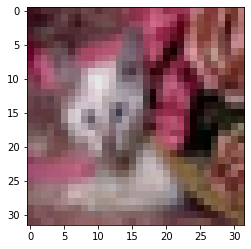

The predicted label: dog
The true label: bird


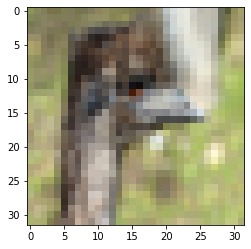

In [ ]:
for i in range(10):
  if predicted[i] != labels[i]:
    print(f'The predicted label: {classes[predicted[i]]}\nThe true label: {classes[labels[i]]}')
    imshow(images[i])